In [55]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('yield-df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [58]:
df.shape

(28242, 7)

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [61]:
df['average_rain_fall_mm_per_year']

0        1485
1        1485
2        1485
3        1485
4        1485
         ... 
28237     657
28238     657
28239     657
28240     657
28241     657
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: int64

In [62]:
def isStr(obj):
    try:
        float(obj)
        return  False
    except :
        return True


In [63]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [64]:
df = df.drop(to_drop)

In [65]:
len(df['Area'].unique())

101

In [66]:
country = (df['Area'].unique())

In [67]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [68]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

Yield per country

<Axes: >

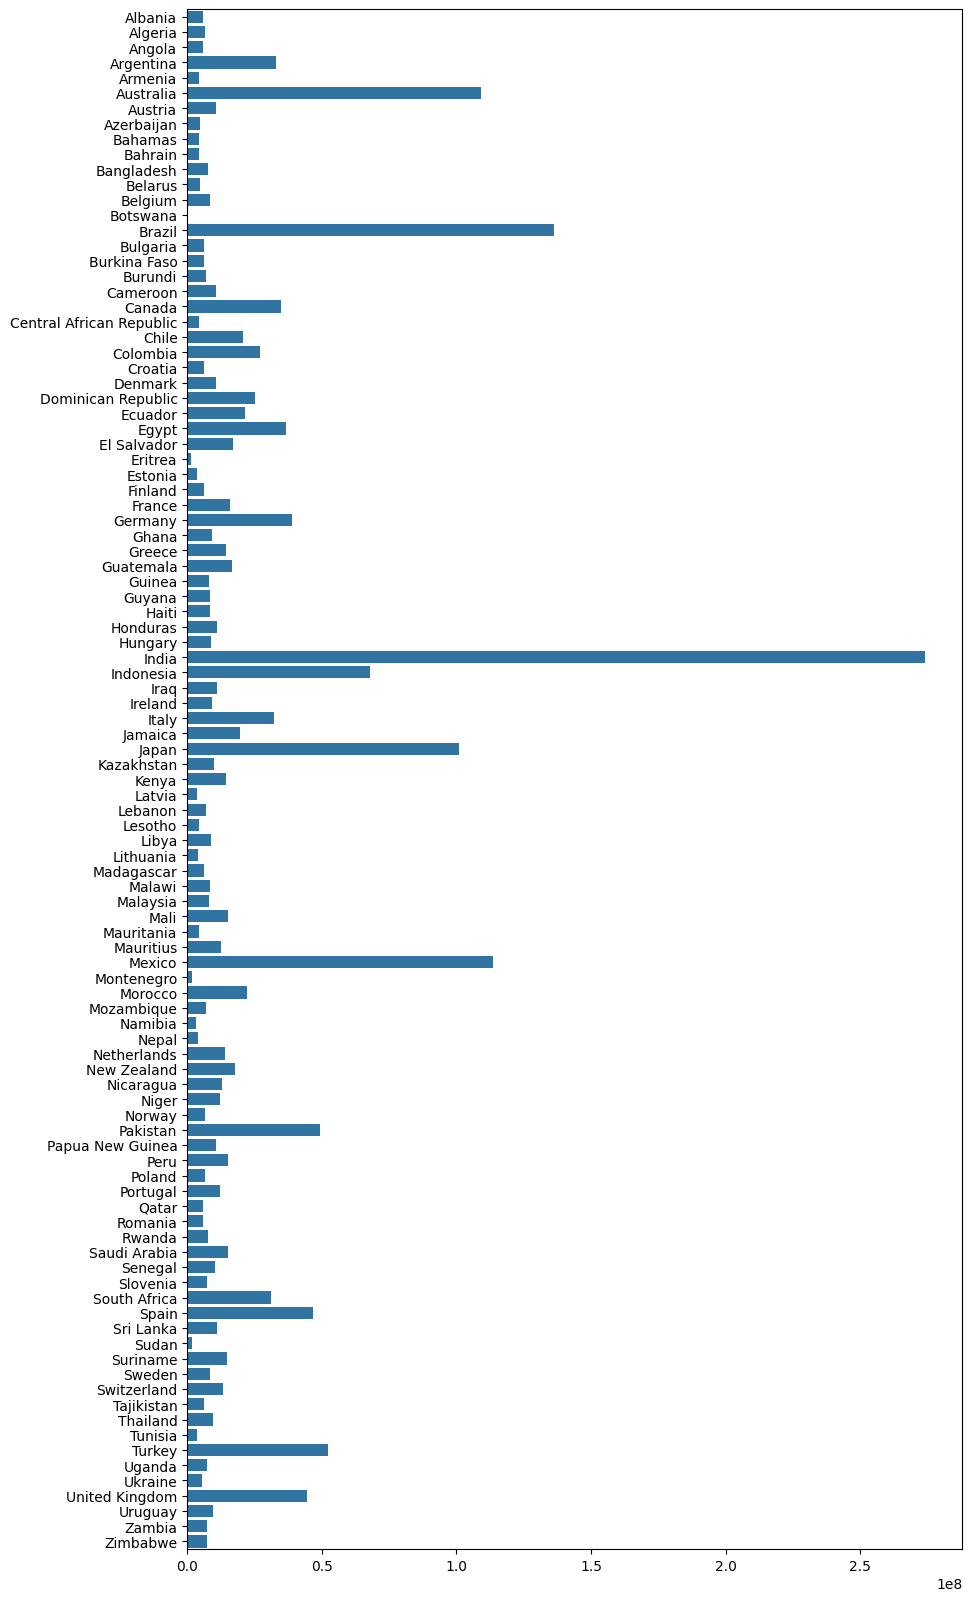

In [69]:
plt.figure(figsize=(10, 20))
sns.barplot(y = country, x = yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

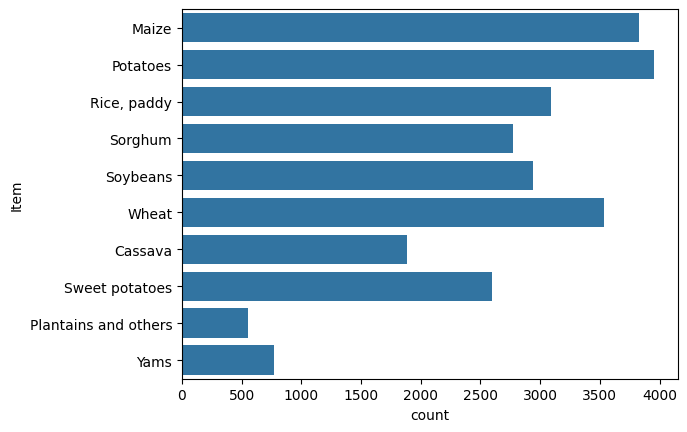

In [70]:
sns.countplot(y = df['Item'])

In [71]:
crops = (df['Item'].unique())

In [72]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())


<Axes: >

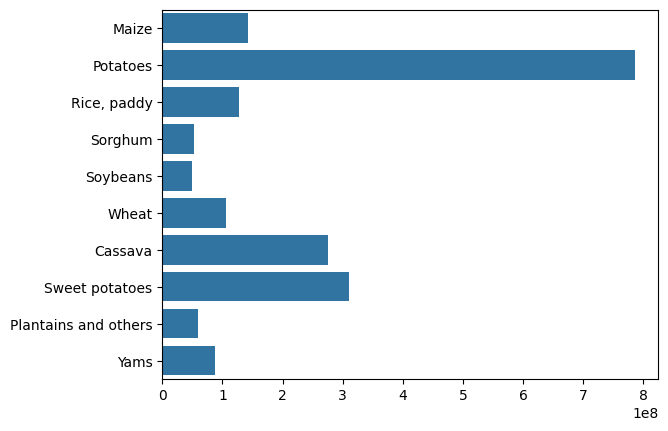

In [73]:
sns.barplot(y = crops, x = yield_per_crop)

In [74]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df = df[col]

Splitting to train and test data & preprocessing

In [75]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240,98328.63,27.51,Colombia,Maize
28212,2010,657,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537,36572.75,7.85,Canada,Wheat
860,1991,534,17866.00,18.73,Australia,Potatoes
17223,1998,250,6416.14,6.94,Kazakhstan,Potatoes


In [79]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [80]:
ohe = OneHotEncoder(drop = 'first')
scaler = StandardScaler()

Preprocessing

In [81]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[4, 5] ),
        ('standardization',scaler, [0, 1, 2, 3])
    ],
    remainder='passthrough'
)

In [82]:
preprocessor 

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [83]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

Model training

In [84]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error,r2_score



In [85]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}


for name, mod in models.items():
    mod.fit(X_train_dummy, y_train)
    y_pred = mod.predict(X_test_dummy)

    print(f"{name} MSE : {mean_squared_error(y_test, y_pred)} Score {r2_score(y_test,y_pred)}")

lr MSE : 1821709520.884795 Score 0.7486566077725832


c:\projects\Crop_Yield\myvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.82422, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE : 1822234158.2996287 Score 0.7485842229351424
rg MSE : 1822542166.3361273 Score 0.7485417267062764
knr MSE : 128210171.76440331 Score 0.9823106927202787
dtr MSE : 163459522.9535377 Score 0.9774472985292063


In [86]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
dtr.predict(X_test_dummy)

array([160124.,  15838.,  72614., ...,  52692.,   9621., 132600.])

Prediction


In [87]:
def prediction(Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])

    transformed_features = preprocessor.transform(features)
    predicted_values = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_values[0]

In [88]:
df.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613


In [89]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp = 26.55
Area = 'Saudi Arabia'
Item = 'Sorghum'

result = prediction(Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

c:\projects\Crop_Yield\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\projects\Crop_Yield\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
result

array([13384.])

Pickle files

In [91]:
import pickle
pickle.dump(dtr, open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [92]:
import sklearn
print(sklearn.__version__)

1.5.2
